In [12]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 10.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=a588e7d773e5d61c10238a8767acc5709fbc9c3630f8fc88773e636db7612754
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


(a)load in the Boston data set

In [15]:
import pandas as pd
from ISLP import load_data
import matplotlib.pyplot as plt
boston = load_data('Boston')
boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


(b)How many rows are in this data set? How many columns? What
do the rows and columns represent?

In [14]:
boston.shape

(506, 13)

Row: Represents one suburb or town in the Boston area.
Column:
*   crim – per capita crime rate by town
*   zn – proportion of residential land zoned for lots over 25,000 sq.ft.
*   indus – proportion of non-retail business acres per town
*   chas – Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   nox – nitric oxides concentration (parts per 10 million)
*   rm – average number of rooms per dwelling
*   age – proportion of owner-occupied units built prior to 1940
*   dis – weighted distances to five Boston employment centers
*   rad – index of accessibility to radial highways
*   tax – full-value property-tax rate per \$10,000
*   ptratio – pupil–teacher ratio by town
*   lstat – percentage of lower status of the population
*   medv – median value of owner-occupied homes (in $1000s)

(c)
Make some pairwise scatterplots of the predictors (columns) in
this data set.

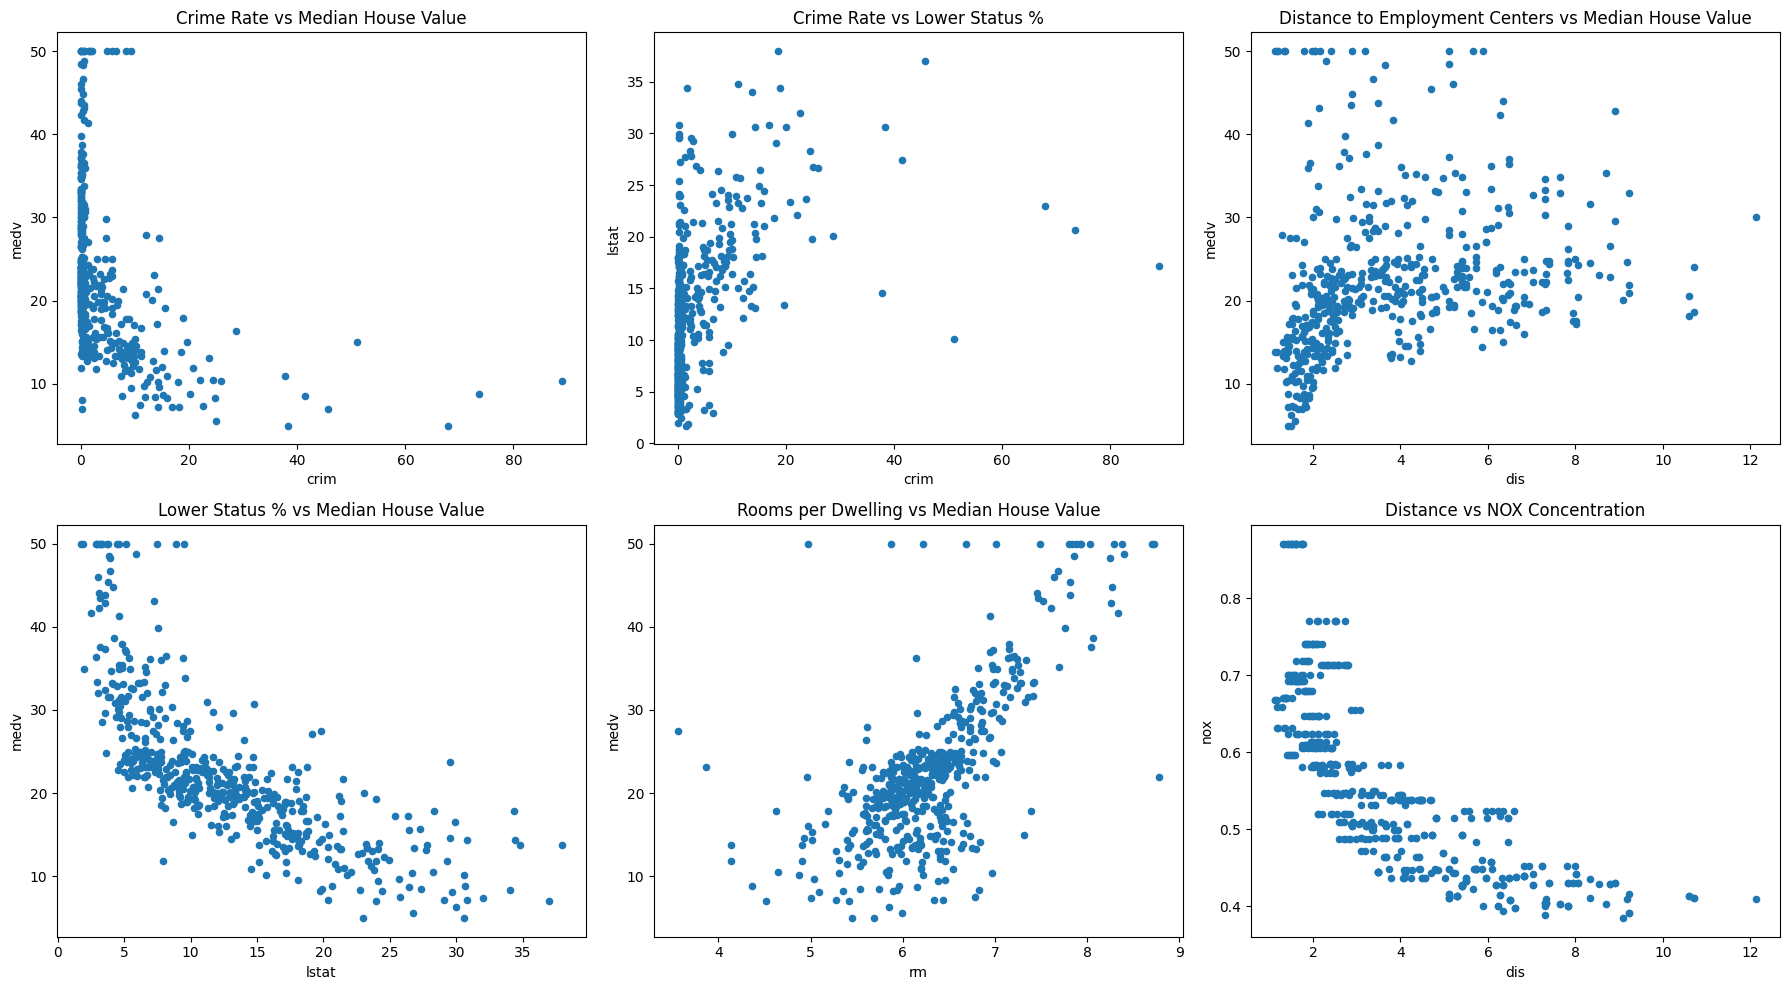

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
boston.plot.scatter(x='crim', y='medv', ax=axes[0,0], title="Crime Rate vs Median House Value")
boston.plot.scatter(x='crim', y='lstat', ax=axes[0,1], title="Crime Rate vs Lower Status %")
boston.plot.scatter(x='dis', y='medv', ax=axes[0,2], title="Distance to Employment Centers vs Median House Value")
boston.plot.scatter(x='lstat', y='medv', ax=axes[1,0], title="Lower Status % vs Median House Value")
boston.plot.scatter(x='rm', y='medv', ax=axes[1,1], title="Rooms per Dwelling vs Median House Value")
boston.plot.scatter(x='dis', y='nox', ax=axes[1,2], title="Distance vs NOX Concentration")

plt.tight_layout()
plt.show()


Summary:

1.   Higher crime rate → lower house value.
2.   Higher crime rate → more lower-status population.
3.   lstat has a strong negative correlation with house value.
4.   rm has a strong positive correlation with house value.
5.   dis shows weak positive relation with house value.
6.   dis and nox are negatively correlated (farther suburbs → cleaner air).

(d)Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

In [20]:
corr_with_crim = boston.corr()['crim'].sort_values(ascending=False)
print(corr_with_crim)

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64


Positive correlations:

* rad: Towns with greater access to radial highways tend
to have higher crime rates.
* lstat: Areas with higher proportions of lower-status population show higher crime rates.
* tax: Higher property-tax rate areas are often older or less desirable towns, which also have higher crime rates.

Negative correlations:

* medv: Higher crime areas tend to have lower housing prices.
* dis: Suburbs farther from the city center usually have lower crime rates.
* zn: Areas with a higher proportion of residential land zoned for large lots tend to have lower crime rates.

(e)Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

In [23]:
cols = ['crim','tax','ptratio']
boston[cols].describe()

,crim,tax,ptratio
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677083,666.000000,20.200000
max,88.976200,711.000000,22.000000


1. Crime rate (crim)
* Q1 = 0.08 and Q2 = 0.26 are very close, so most suburbs are safe.
* Q3 = 3.68 and mean = 3.61 show that only a few suburbs have very high crime rates.

2. Property-tax rate (tax)
* Q1 = 279 and Q2 = 330 are similar, but Q3 = 666 is much higher.
* This means only about 25% of suburbs face unusually high tax rates.

3. Pupil–teacher ratio (ptratio)
* Q1 = 17.4, Q2 = 19.05, and Q3 = 20.2 are close, with std = 2.16.
* The distribution is relatively even compared to crime rate and tax.

(f)How many of the suburbs in this data set bound the Charles river?

In [26]:
boston['chas'].sum()

np.int64(35)

(g)What is the median pupil-teacher ratio among the towns in this data set?

In [27]:
boston['ptratio'].median()

19.05

(h)Which suburb of Boston has lowest median value of owner-
occupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

In [30]:
min_medv = boston['medv'].idxmin()
lowest_suburb = boston.loc[min_medv]
print(min_medv)
print(lowest_suburb)

summary = boston.describe().T[['min','25%','50%','75%','max']]
compare = pd.DataFrame({
    'This suburb': lowest_suburb,
    'Overall min': summary['min'],
    'Overall 25%': summary['25%'],
    'Overall 50%': summary['50%'],
    'Overall 75%': summary['75%'],
    'Overall max': summary['max']
})
compare

398
crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64


,This suburb,Overall min,Overall 25%,Overall 50%,Overall 75%,Overall max
crim,38.3518,0.00632,0.082045,0.25651,3.677083,88.9762
zn,0.0000,0.00000,0.000000,0.00000,12.500000,100.0000
indus,18.1000,0.46000,5.190000,9.69000,18.100000,27.7400
chas,0.0000,0.00000,0.000000,0.00000,0.000000,1.0000
nox,0.6930,0.38500,0.449000,0.53800,0.624000,0.8710
rm,5.4530,3.56100,5.885500,6.20850,6.623500,8.7800
age,100.0000,2.90000,45.025000,77.50000,94.075000,100.0000
dis,1.4896,1.12960,2.100175,3.20745,5.188425,12.1265
rad,24.0000,1.00000,4.000000,5.00000,24.000000,24.0000
tax,666.0000,187.00000,279.000000,330.00000,666.000000,711.0000


medv is 5.0, the lowest in the dataset.

crim = 38.35 is far above the median (0.26).

rm = 5.45 is below the median (6.21), suggesting poorer housing quality.

Age = 100 indicates nearly all old houses.

dis = 1.49 is short, but this does not improve house values.

tax = 666 is very high, close to the upper bound.

ptratio = 20.2 is higher than the median (19.05), meaning fewer education resources.

Percentage of lower-status population (lstat = 30.6) is extremely high compared to the median (11.36).

In short, high crime, poor housing, heavy tax burden, high student–teacher ratios, and a high proportion of low-income population explains why this suburb has the lowest housing values.

(i)In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.

In [31]:
more_than_7 = sum(boston['rm'] > 7)
more_than_8 = sum(boston['rm'] > 8)
avr_beyond_8 = boston[boston['rm'] > 8]
more_than_7, more_than_8, avr_beyond_8

(64,
 13,
         crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
 97   0.12083   0.0   2.89     0  0.4450  8.069  76.0  3.4952    2  276   
 163  1.51902   0.0  19.58     1  0.6050  8.375  93.9  2.1620    5  403   
 204  0.02009  95.0   2.68     0  0.4161  8.034  31.9  5.1180    4  224   
 224  0.31533   0.0   6.20     0  0.5040  8.266  78.3  2.8944    8  307   
 225  0.52693   0.0   6.20     0  0.5040  8.725  83.0  2.8944    8  307   
 226  0.38214   0.0   6.20     0  0.5040  8.040  86.5  3.2157    8  307   
 232  0.57529   0.0   6.20     0  0.5070  8.337  73.3  3.8384    8  307   
 233  0.33147   0.0   6.20     0  0.5070  8.247  70.4  3.6519    8  307   
 253  0.36894  22.0   5.86     0  0.4310  8.259   8.4  8.9067    7  330   
 257  0.61154  20.0   3.97     0  0.6470  8.704  86.9  1.8010    5  264   
 262  0.52014  20.0   3.97     0  0.6470  8.398  91.5  2.2885    5  264   
 267  0.57834  20.0   3.97     0  0.5750  8.297  67.0  2.4216    5  264   
 364  3.47428  

Brief summary:

There are 64 suburbs with more than 7 rooms per dwelling, and 13 suburbs have more than 8 rooms.

These suburbs are generally associated with higher house values, lower crime rates, and a smaller proportion of lower-status populations, indicating they are wealthier and more desirable neighborhoods.